[[ 0. 16. 58.  0.  0.  0.]
 [16.  0. 37.  0. 13. 48.]
 [58. 37.  0. 33.  0. 53.]
 [ 0.  0. 33.  0. 14.  0.]
 [ 0. 13.  0. 14.  0. 10.]
 [ 0. 48. 53.  0. 10.  0.]]
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 14.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0. 14.  0.  0.  0.]]


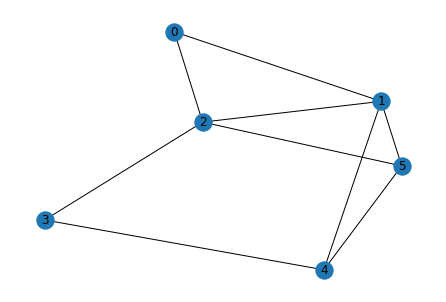

In [144]:
import random
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt

def generate_instance(nb_vertex, min_weight, max_weight):
  """
  Generate a random instance of a graph
  """
  graph = np.zeros((nb_vertex, nb_vertex))
  for i in range(nb_vertex - 1):
    for j in range(i+1, nb_vertex):
      if random.uniform(0, 1) < 0.5:
        weight = random.randint(min_weight, max_weight)
        graph[i, j] = weight
        graph[j, i] = weight
  for i,line in enumerate(graph):
    index_zeros = np.where(line == 0)[0]
    index_zeros = np.delete(index_zeros, np.where(index_zeros == i))
    for j in range(len(index_zeros) - (nb_vertex - 3)):
      index = random.choice(index_zeros)
      index_zeros = np.delete(index_zeros, np.where(index_zeros == index))
      weight = random.randint(min_weight, max_weight)
      graph[i, index] = weight
      graph[index, i] = weight
  return graph

def generate_trafic(nb_vertex, min_weight, max_weight):
  """
  Generate a random instance of a trafic
  """
  graph = np.zeros((nb_vertex, nb_vertex))
  for i in range(nb_vertex - 1):
    for j in range(i + 1, nb_vertex):
      if random.uniform(0, 1) < 0.2:
        weight = random.randint(min_weight, max_weight)
        graph[i, j] = weight
        graph[j, i] = weight
  return graph



graph = generate_instance(6,10,60)
trafic = generate_trafic(6,10,20)
print(graph)
print(trafic)
G = nx.from_numpy_matrix(np.array(graph))  
nx.draw(G, with_labels=True) 